In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from google.colab import files
df_india = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data Set/Extended Data.xlsx")

In [4]:
df_india.head()

,Sr.No,Date,Country,Confirmed,Deaths,Recovered,Active,New Cases,New Recovered,New Deaths
0,33504.0,2020-01-30,India,1,0,0,1,1,0,0
1,33505.0,2020-01-31,India,1,0,0,1,0,0,0
2,33506.0,2020-02-01,India,1,0,0,1,0,0,0
3,33507.0,2020-02-02,India,2,0,0,2,1,0,0
4,33508.0,2020-02-03,India,3,0,0,3,1,0,0


In [15]:
df_india.tail()

,Sr.No,Date,Country,Confirmed,Deaths,Recovered,Active,New Cases,New Recovered,New Deaths
437,33941.0,2021-04-11,India,13527717,170179,12156529,1201009,168912,75086,904
438,33942.0,2021-04-12,India,13689453,171058,12253697,1264698,161736,97168,879
439,33943.0,2021-04-13,India,13873825,172085,12336036,1365704,184372,82339,1027
440,33944.0,2021-04-14,India,14074564,173123,12429564,1471877,200739,93528,1038
441,33945.0,2021-04-15,India,14291917,174308,12547866,1569743,217353,118302,1185


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
#from statsmodels.tsa.api import Holt

In [17]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sr.No          442 non-null    float64       
 1   Date           442 non-null    datetime64[ns]
 2   Country        442 non-null    object        
 3   Confirmed      442 non-null    object        
 4   Deaths         442 non-null    object        
 5   Recovered      442 non-null    object        
 6   Active         442 non-null    object        
 7   New Cases      442 non-null    object        
 8   New Recovered  442 non-null    object        
 9   New Deaths     442 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 58.0+ KB


In [18]:
df_india["Date"] = pd.to_datetime(df_india["Date"])

In [19]:
#Grouping differnent types of cases as per the date
datewise = df_india.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum","Active":"sum"})

In [20]:
datewise["WeekofYear"] = datewise.index.weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [21]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days

In [22]:
import plotly.express as px
fig = px.bar(datewise, x=datewise.index, y='Active',color='Deaths')
fig.show()

In [23]:
datewise.corr(method='pearson')

,Confirmed,Recovered,Deaths,Active,WeekofYear,Days Since
Confirmed,1.000000,0.997852,0.995688,0.392685,0.105853,0.963226
Recovered,0.997852,1.000000,0.991074,0.331609,0.069425,0.956244
Deaths,0.995688,0.991074,1.000000,0.424278,0.159185,0.968021
Active,0.392685,0.331609,0.424278,1.000000,0.543047,0.445978
WeekofYear,0.105853,0.069425,0.159185,0.543047,1.000000,0.125704
Days Since,0.963226,0.956244,0.968021,0.445978,0.125704,1.000000


**------------------------------------------------------------------------------------**

## **Linear Regression** - 


In [24]:
a =datewise['Days Since']
b =datewise['Confirmed']

### Code & Validation

In [31]:
from sklearn.model_selection import KFold

In [65]:
linear_regression=LinearRegression()


scores = []
######################################################################################################################
Linear_Regression = LinearRegression()
######################################################################################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(a):
    X_train, X_test, y_train, y_test= a[train_index], a[test_index], b[train_index], b[test_index]
    Linear_Regression.fit(X_train.values.reshape(-1,1), y_train)
    scores.append(Linear_Regression.score(X_test.values.reshape(-1,1), y_test))

print("Average score for Linear Regression:",sum(scores)/len(scores))    


Average score for Linear Regression: 0.9242046128602995


### Evaluation

In [68]:
#without cross validation
Linear_Regression.fit(a.values.reshape(-1,1), b)
evaluation_1 =Linear_Regression.predict(X_test.values.reshape(-1,1))
score=Linear_Regression.score(X_test.values.reshape(-1,1), y_test)   
print("Final Evaluation Score for Linear Regression :",score)

Final Evaluation Score for Linear Regression : 0.9300455244014437


### Prediction for new days

In [66]:
#X_prediction = [[446],[447],[448],[449],[450],[451],[452],[453],[454],[455],[456],[457],[458],[459],[460]]

Z_pred = []  #make an array
for i in range(446,500):
  Z_pred.append([i])

In [67]:
print('Evaluation for expecting 55 days in future in Linear_Regression:')
for predict in Z_pred:
  print('day',predict,'=',int(Linear_Regression.predict([predict])))

Evaluation for expecting 55 days in future in Linear_Regression:
day [446] = 13250847
day [447] = 13286860
day [448] = 13322873
day [449] = 13358886
day [450] = 13394899
day [451] = 13430912
day [452] = 13466925
day [453] = 13502939
day [454] = 13538952
day [455] = 13574965
day [456] = 13610978
day [457] = 13646991
day [458] = 13683004
day [459] = 13719017
day [460] = 13755030
day [461] = 13791043
day [462] = 13827056
day [463] = 13863069
day [464] = 13899082
day [465] = 13935096
day [466] = 13971109
day [467] = 14007122
day [468] = 14043135
day [469] = 14079148
day [470] = 14115161
day [471] = 14151174
day [472] = 14187187
day [473] = 14223200
day [474] = 14259213
day [475] = 14295226
day [476] = 14331239
day [477] = 14367253
day [478] = 14403266
day [479] = 14439279
day [480] = 14475292
day [481] = 14511305
day [482] = 14547318
day [483] = 14583331
day [484] = 14619344
day [485] = 14655357
day [486] = 14691370
day [487] = 14727383
day [488] = 14763397
day [489] = 14799410
day [490] =

### Plot

Here the data are displayed in logarithmic representation

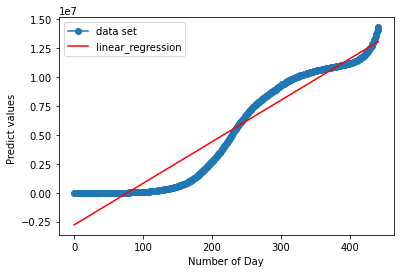

In [ ]:
predicted1 = Linear_Regression.predict(a.values.reshape(-1,1))
predicted11 = Linear_Regression.predict(a.values.reshape(-1,1))
plt.plot(a, b, 'o-',label='data set')
plt.plot(a, predicted1,c='#ff0000',label='linear_regression')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict values ')
plt.show()



---


Here the data is displayed by exponential representation (linear_regression Curve Was Converted)

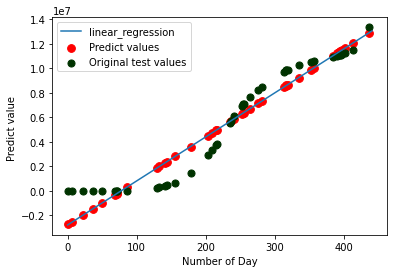

In [ ]:
plt.plot(a, predicted11,label='linear_regression')
plt.scatter(X_test, evaluation_1 ,s=60, c='#ff0000',label='Predict values')
plt.scatter(X_test, y_test ,s=50, c='#003300',label='Original test values')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value ')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from fbprophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
std=StandardScaler()
#pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [ ]:
lin_pred=Linear_Regression.predict(np.array(a).reshape(-1,1))
plt.figure(figsize=(11,6))

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=lin_pred,
                    mode='lines',name="Linear Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

 ## **Polynomial Regression** 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 6) #6

  
scores = []
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(a):
    X_train, X_test, y_train, y_test , yy_train, yy_test= a[train_index], a[test_index], b[train_index], b[test_index], yy[train_index], yy[test_index]
    X_poly = poly.fit_transform(X_train.values.reshape(-1,1))
    lin2 = LinearRegression()
    lin2.fit(X_poly, y_train)
    scores.append(lin2.score(poly.fit_transform(X_test.values.reshape(-1,1)),y_test))
    

In [ ]:
sum(scores)/len(scores)

0.9984902380913144

In [ ]:
print('Evaluation for expecting 55 days in future in Linear_Regression:')
for predict in Z_pred:
  print('day',predict,'=',int(lin2.predict(poly.fit_transform([predict]))))

Evaluation for expecting 55 days in future in Linear_Regression:
day [446] = 15052684
day [447] = 15246088
day [448] = 15445939
day [449] = 15652381
day [450] = 15865562
day [451] = 16085630
day [452] = 16312737
day [453] = 16547035
day [454] = 16788681
day [455] = 17037830
day [456] = 17294642
day [457] = 17559278
day [458] = 17831901
day [459] = 18112676
day [460] = 18401772
day [461] = 18699357
day [462] = 19005603
day [463] = 19320683
day [464] = 19644774
day [465] = 19978054
day [466] = 20320702
day [467] = 20672901
day [468] = 21034836
day [469] = 21406694
day [470] = 21788663
day [471] = 22180935
day [472] = 22583704
day [473] = 22997165
day [474] = 23421517
day [475] = 23856960
day [476] = 24303697
day [477] = 24761933
day [478] = 25231876
day [479] = 25713737
day [480] = 26207726
day [481] = 26714059
day [482] = 27232954
day [483] = 27764629
day [484] = 28309308
day [485] = 28867214
day [486] = 29438575
day [487] = 30023620
day [488] = 30622582
day [489] = 31235695
day [490] =

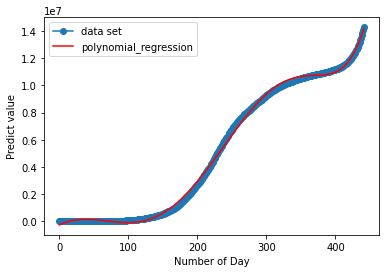

In [ ]:
predicted1 = lin2.predict(poly.fit_transform(a.values.reshape(-1,1)))
predicted11 = lin2.predict(poly.fit_transform(a.values.reshape(-1,1)))
plt.plot(a, yy, 'o-',label='data set')
plt.plot(a, predicted1,c='#ff0000',label='polynomial_regression')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value')
plt.show()

**------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [ ]:
comp_data=poly.fit_transform(np.array(a).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=lin2.predict(comp_data)
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

## **Decision** **Tree**

In [54]:
from sklearn.tree import tree

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.



3 features DT


In [55]:
df = pd.DataFrame(datewise, columns = ['Deaths','Days Since','Recovered'])
df_array = df.to_numpy()
type(df_array)

numpy.ndarray

In [57]:
X=df
dfy = pd.DataFrame(datewise, columns = ['Confirmed'])
dfy_array = dfy.to_numpy()

In [58]:
#X_prediction = [[417],[418],[419],[420],[421],[422]]
aa = np.array([182553,451,13276039])
aa = aa.reshape(1,-1)
bb = np.array([230168,466,17280844])
bb = bb.reshape(1,-1)


In [59]:
Decision_tree = tree.DecisionTreeRegressor()
yy=b
scores = []
######################################################################################################################
Decision_tree = DecisionTreeRegressor()
######################################################################################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(df_array):
    X_train, X_test, y_train, y_test= df_array[train_index], df_array[test_index], dfy_array[train_index], dfy_array[test_index]
    #X_train, X_test, y_train, y_test , yy_train, yy_test= a[train_index], a[test_index], b[train_index], b[test_index], yy[train_index], yy[test_index]
    Decision_tree.fit(X_train, y_train)
    scores.append(Decision_tree.score(X_test,y_test))
    
print("Average score for Decision Tree:",sum(scores)/len(scores))

Average score for Decision Tree: 0.9998968748353378


In [60]:
#X_prediction = [[441],[442],[443],[444],[445],[446]]

In [63]:
Decision_tree.fit(df_array, dfy_array)

evaluation_5 =Decision_tree.predict(X_test)
score=Decision_tree.score(X_test, y_test)   
print("Final Evaluation Score for Decision Tree Regression :",score)

Final Evaluation Score for Decision Tree Regression : 1.0


In [70]:
print('Evaluation for expecting 6 days in future in SVR_Regression:')   #SVR Regressor 6
print('day 451','=',int(Decision_tree.predict(aa)))
print('day 466','=',int(Decision_tree.predict(bb)))

Evaluation for expecting 6 days in future in SVR_Regression:
day 451 = 14291917
day 466 = 14291917


## **SVR**

### Code & Validation

In [71]:
df = pd.DataFrame(datewise, columns = ['Deaths','Days Since','Recovered'])
df_array = df.to_numpy()
type(df_array)
#type(df)

numpy.ndarray

In [72]:
X=df
dfy = pd.DataFrame(datewise, columns = ['Confirmed'])
dfy_array = dfy.to_numpy()

In [76]:
scores_1 = []
scores_2 = []
scores_3 = []
scores_4 = []
scores_5 = []
scores_6 = []
"""
C = 331.99 degree= 3 kernel ="poly"    -------> Average score :0.8002390827501171
C = 331.99 degree= 3 kernel ="poly"    -------> Average score :0.8112666373821353
C = 3001.99 degree= 2 kernel ="poly"    -------> Average score : 0.916432692004831
C = 5000 degree= 2 kernel ="poly"    -------> Average score : 0.9246252337893296
C = 29999.99 degree= 2 kernel ="poly"    -------> Average score : 0.929753801305709

"""
######################################################################################################################
SVR_Regressor_1 = SVR(kernel='rbf')
SVR_Regressor_2 = SVR(kernel='poly',degree=5)
SVR_Regressor_3 = SVR(kernel='linear')
SVR_Regressor_4 = SVR(kernel='poly',degree=2)
SVR_Regressor_5 = SVR(kernel='poly',degree=7)
SVR_Regressor_6 = SVR(kernel='poly',degree=2,C=5000)
######################################################################################################################

# a =datewise['Days Since']
#b =datewise['Confirmed']

cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(df_array):
    X_train, X_test, y_train, y_test= df_array[train_index], df_array[test_index], dfy_array[train_index], dfy_array[test_index]
    #
    SVR_Regressor_1.fit(X_train, y_train)
    scores_1.append(SVR_Regressor_1.score(X_test, y_test))
    #
    SVR_Regressor_2.fit(X_train, y_train)
    scores_2.append(SVR_Regressor_2.score(X_test, y_test))
    #
    SVR_Regressor_4.fit(X_train, y_train)
    scores_4.append(SVR_Regressor_4.score(X_test, y_test))
    #
    SVR_Regressor_5.fit(X_train, y_train)
    scores_5.append(SVR_Regressor_5.score(X_test, y_test))
    #
    SVR_Regressor_6.fit(X_train, y_train)
    scores_6.append(SVR_Regressor_6.score(X_test, y_test))

print("Average score for SVR_Regressor_1:",sum(scores_1)/10,
      "\nAverage score for SVR_Regressor_2:",sum(scores_2)/10,
      "\nAverage score for SVR_Regressor_3:",sum(scores_3)/10,
      "\nAverage score for SVR_Regressor_4:",sum(scores_4)/10,
      "\nAverage score for SVR_Regressor_5:",sum(scores_5)/10, 
      "\nAverage score for SVR_Regressor_6:",sum(scores_6)/10)  


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConv

Average score for SVR_Regressor_1: -0.10486544781470489 
Average score for SVR_Regressor_2: -0.09569851365197314 
Average score for SVR_Regressor_3: 0.0 
Average score for SVR_Regressor_4: -0.1046139625957037 
Average score for SVR_Regressor_5: -0.01007905845917153 
Average score for SVR_Regressor_6: 0.7784923708434317


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConv

**After the validation we chosed best parameter for SVR (SVR_Regressor_6) to evaluate:**

### Evaluation

In [77]:
#SVR_Regressor 6
SVR_Regressor_6.fit(df_array, dfy_array)

evaluation_2 =SVR_Regressor_6.predict(df_array)
score=SVR_Regressor_6.score(df_array, dfy_array)  
print("Final Evaluation Score for SVR Regression :",score)

Final Evaluation Score for SVR Regression : 0.8279360793649198


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



### Prediction for new days

In [78]:
#deaths , days since, recovered

aa = np.array([174308,441,12547866])
bb = np.array([192311,450,14085110])
cc = np.array([230168,486,17280844])

bb = bb.reshape(1,-1)
aa = aa.reshape(1,-1)
cc = cc.reshape(1,-1)

In [79]:
#SVR Regressor 3
print('day 441 =',int(SVR_Regressor_6.predict(aa)), 'real value = 14291917')
print('day 445 =',int(SVR_Regressor_6.predict(bb)), 'real value = 16960172')
print('day 486 =',int(SVR_Regressor_6.predict(cc)), 'real value = 21077410')

day 441 = 13859564 real value = 14291917
day 445 = 16646341 real value = 16960172
day 486 = 23469223 real value = 21077410


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------**

## **MLPRegressor**

### Code & Validation

In [81]:
from sklearn.neural_network import MLPRegressor

In [82]:
scores_1 = []
scores_2 = []
scores_3 = []
scores_4 = []
scores_5 = []
######################################################################################################################
MLP_Regressor_1 = MLPRegressor(hidden_layer_sizes=(4), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=120, validation_fraction=0.1)
MLP_Regressor_2 = MLPRegressor(hidden_layer_sizes=(1), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=120, validation_fraction=0.1)
MLP_Regressor_3 = MLPRegressor(hidden_layer_sizes=(1), activation='tanh', solver='lbfgs' ,learning_rate_init=0.3, max_iter=1000,random_state=120, validation_fraction=0.2)
MLP_Regressor_4 = MLPRegressor(hidden_layer_sizes=(9), activation='relu', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=1, validation_fraction=0.1)
MLP_Regressor_5 = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='sgd' ,learning_rate_init=0.01, max_iter=1000,random_state=1, validation_fraction=0.1)
######################################################################################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(df_array):
    X_train, X_test, y_train, y_test ,yy_train, yy_test= df_array[train_index], df_array[test_index], dfy_array[train_index], dfy_array[test_index], yy[train_index], yy[test_index]
    #
    MLP_Regressor_1.fit(X_train, y_train)
    scores_1.append(MLP_Regressor_1.score(X_test,y_test))
    #
    MLP_Regressor_2.fit(X_train, y_train)
    scores_2.append(MLP_Regressor_2.score(X_test,y_test))
    #
    MLP_Regressor_3.fit(X_train, y_train)
    scores_3.append(MLP_Regressor_3.score(X_test,y_test))
     #
    MLP_Regressor_4.fit(X_train, y_train)
    scores_4.append(MLP_Regressor_4.score(X_test,y_test))
    #
    MLP_Regressor_5.fit(X_train, y_train)
    scores_5.append(MLP_Regressor_5.score(X_test,y_test))

print("Average score for MLP_Regressor_1:",sum(scores_1)/10,"\nAverage score for MLP_Regressor_2:",sum(scores_2)/10,"\nAverage score for MLP_Regressor_3:",sum(scores_3)/10
      ,"\nAverage score for MLP_Regressor_4:",sum(scores_4)/10,"\nAverage score for MLP_Regressor_5:",sum(scores_5)/10)    


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_

Average score for MLP_Regressor_1: 0.45128468824864126 
Average score for MLP_Regressor_2: 0.1488583541161284 
Average score for MLP_Regressor_3: 0.1488583541161284 
Average score for MLP_Regressor_4: 0.9981666600173661 
Average score for MLP_Regressor_5: -0.04511641351598268


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



**After the validation we chosed best parameter for MLP (MLP_Regressor_4) to evaluate:**

### Evaluation

In [83]:
MLP_Regressor = MLP_Regressor_4
MLP_Regressor.fit(X_train, y_train)
y_test_log=np.log10(y_test)
evaluation_3 =MLP_Regressor.predict(X_test)
score=MLP_Regressor.score(X_test, y_test)   
print("Final Evaluation Score for MLP_Regressor :",score)

Final Evaluation Score for MLP_Regressor : 0.9983437453448764


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



### Prediction for new days

In [84]:
#X_prediction = [[417],[418],[419],[420],[421],[422]]

In [85]:
print('Evaluation for expecting 6 days in future in SVR_Regression:')   #SVR Regressor 3
aa = aa.reshape(1,-1)
print('day',predict,'=',int(SVR_Regressor_6.predict(aa)))

Evaluation for expecting 6 days in future in SVR_Regression:
day [499] = 13859564


In [86]:
MLP_Regressor_7 = MLPRegressor(hidden_layer_sizes=(10), activation='relu', solver='lbfgs' ,learning_rate_init=20, max_iter=1000,random_state=20, validation_fraction=0.2)
MLP_Regressor_7.fit(X_train, y_train)
MLP_Regressor_7.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.9988154188708812

In [87]:
print('Evaluation for expecting 6 days in future in MLP_Regressor:')
print('day',predict,'=',int(MLP_Regressor_7.predict(aa)))

Evaluation for expecting 6 days in future in MLP_Regressor:
day [499] = 13133900


**------------------------------------------------------------------------------------------------------------------------**